In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Read Dataset  and set col index
#created one column (Sl No) in excel file to set up as index column
data_df=pd.read_csv('C:\\Users\\Hp\\Desktop\\Wine.csv')
print(data_df.head())
print(data_df.shape)
print(data_df.columns)

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [4]:
wine_df=data_df.iloc[:,0:12]
print(wine_df)
print(wine_df.isna().sum())

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

In [5]:
wine_df.describe()
wine_df

,Malic_Acid,Ash,Ash_Alcanity,Magnesium
count,178.000000,178.000000,178.000000,178.000000
mean,2.336348,2.366517,19.494944,99.741573
std,1.117146,0.274344,3.339564,14.282484
min,0.740000,1.360000,10.600000,70.000000
25%,1.602500,2.210000,17.200000,88.000000
50%,1.865000,2.360000,19.500000,98.000000
75%,3.082500,2.557500,21.500000,107.000000
max,5.800000,3.230000,30.000000,162.000000


   Malic_Acid   Ash  Ash_Alcanity  Magnesium
0        1.71  2.43          15.6        127
1        1.78  2.14          11.2        100
2        2.36  2.67          18.6        101
3        1.95  2.50          16.8        113
4        2.59  2.87          21.0        118


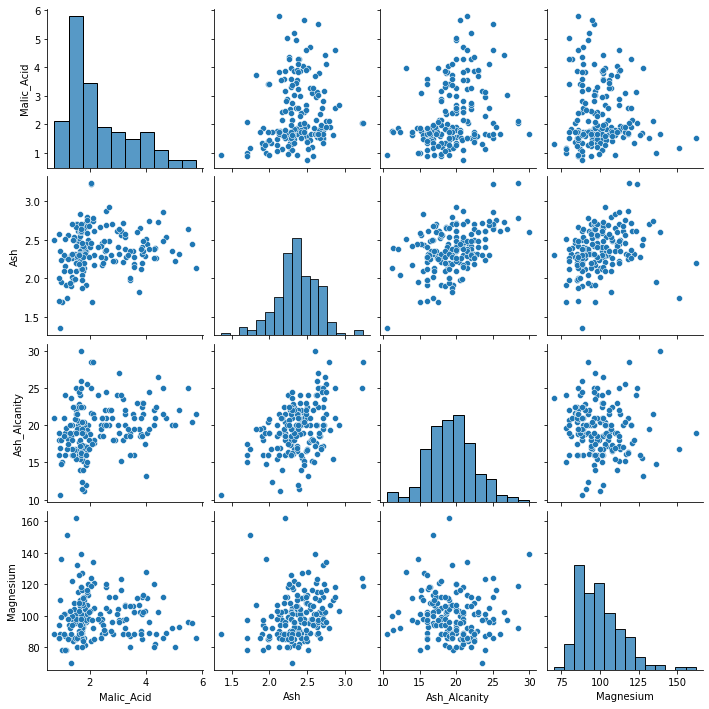

In [7]:
import seaborn as sns
sns.pairplot(wine_df)
wine_df.head()
wine_df.dtypes

print(wine_df.head())


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


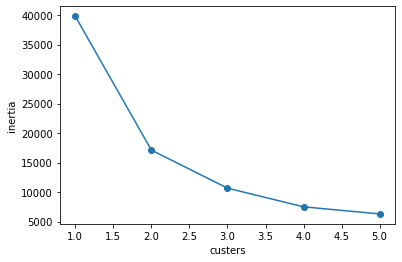

In [5]:
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=3)
ks=range(1,6)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(wine_df)
    inertia.append(model.inertia_)
plt.plot(ks,inertia,'-o')
plt.xlabel('custers')
plt.ylabel('inertia')
plt.show()

In [8]:
model_kmeans.fit(wine_df)
alcohol=model_kmeans.predict(wine_df)
print(alcohol)
print(wine_df.head(2))

sample=[[14,2,3,15,127,3,3,.5,2.25,5.5,1,4]]
new_label=model_kmeans.predict(sample)
print(new_label)
model_kmeans.inertia_

[1 0 0 0 1 0 0 1 0 0 0 0 2 2 0 0 1 1 0 1 1 0 0 0 0 1 2 2 0 0 0 0 0 1 0 0 0
 0 0 1 1 2 0 0 0 0 0 0 0 0 2 2 0 1 1 1 1 0 0 2 0 0 2 2 0 0 2 2 0 1 0 2 2 1
 0 0 2 0 1 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 1 1 2 2 2 0 2 0 2 2 2 2 2 2 2 0
 2 0 2 2 2 2 0 2 2 0 1 0 2 2 2 2 2 2 2 1 0 0 0 2 2 2 0 2 0 0 2 0 2 0 0 2 2
 2 0 1 0 1 0 0 2 2 0 0 2 2 0 0 0 2 2 0 2 0 0 0 2 2 0 0 1 1 0]
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   

   OD280  
0   3.92  
1   3.40  
[1]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


10664.582951836797

In [9]:
proline=data_df['Proline']
df=pd.DataFrame({"alcohol":alcohol,'proline':proline})
df.head()

,alcohol,proline
0,1,1065
1,0,1050
2,0,1185
3,0,1480
4,1,735


In [10]:
pd.crosstab(df['alcohol'],df['proline'])

proline,278,290,312,315,325,342,345,352,355,365,...,1295,1310,1320,1375,1450,1480,1510,1515,1547,1680
alcohol,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,2,0,1,1,...,0,1,0,0,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,1,1,1,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(scalar,model_kmeans)

In [12]:
pipe.fit(wine_df)
label_sc=pipe.predict(wine_df)
print(label_sc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 0 2 2 0 2 2 2 2 0 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [17]:
df.columns
#chk model
species=df['proline']
data_df=pd.DataFrame({'alcohol':label_sc,'proline':proline})
data_df

,alcohol,proline
0,0,1065
1,0,1050
2,0,1185
3,0,1480
4,0,735
...,...,...
173,1,740
174,1,750
175,1,835
176,1,840


In [18]:
pd.crosstab(data_df['alcohol'],data_df['proline'])

proline,278,290,312,315,325,342,345,352,355,365,...,1295,1310,1320,1375,1450,1480,1510,1515,1547,1680
alcohol,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#normalisation
from sklearn.preprocessing import Normalizer
norm=Normalizer()
pipe1=make_pipeline(norm,model_kmeans)
pipe1.fit(wine_df)
labels_no=pipe1.predict(wine_df)
print(labels_no)
proline=data_df['proline']
df=pd.DataFrame({'alcohol':labels_no,'proline':proline})
df
pd.crosstab(df['alcohol'],df['proline'])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1
 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 2 2 2 1 1 2 1 1 2 1 1 0 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2]


proline,278,290,312,315,325,342,345,352,355,365,...,1295,1310,1320,1375,1450,1480,1510,1515,1547,1680
alcohol,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#density based clustering alg
data_df=pd.read_csv('C:\\Users\\Hp\\Desktop\\Wine.csv')
print(data_df.head())
print(data_df.shape)
print(data_df.columns)

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [23]:
data_df.isnull().any().any()

False

In [26]:
x = data_df.loc[:,['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']].values


In [27]:
print(x.shape)

(178, 13)


In [28]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours


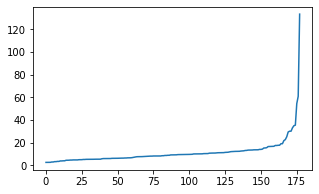

In [35]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
#distances = distances[:, 12] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [ ]:
min=20
eps=40


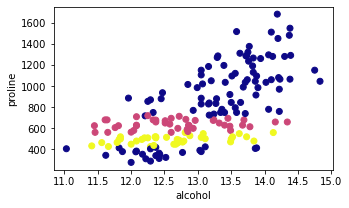

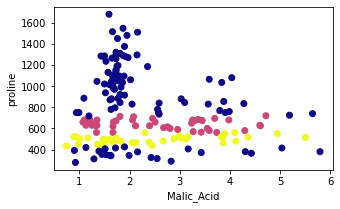

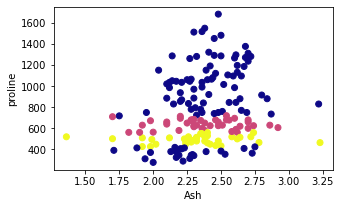

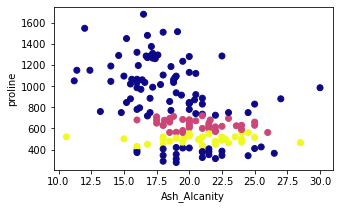

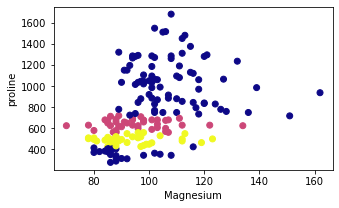

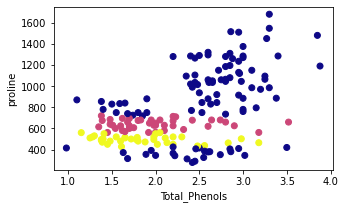

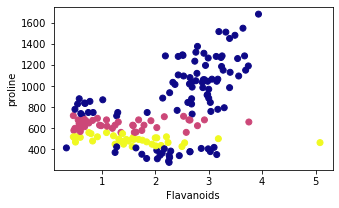

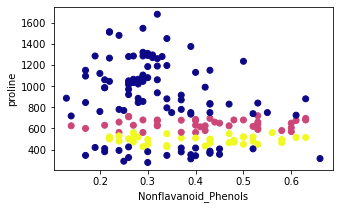

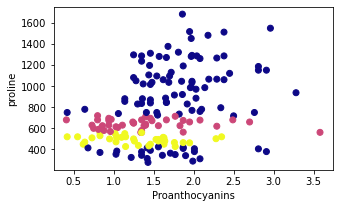

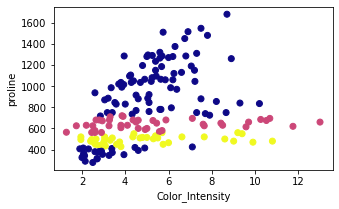

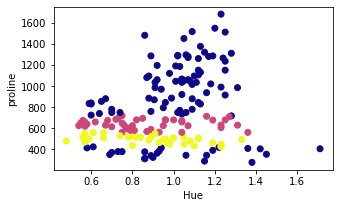

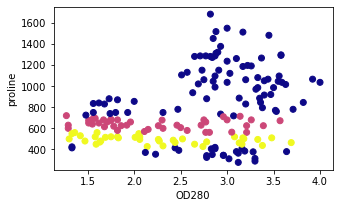

In [40]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 40, min_samples = 20).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels
# Plot the clusters
plt.scatter(x[:, 0], x[:,12], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("alcohol") # X-axis label
plt.ylabel("proline") # Y-axis label
plt.show() # showing the plot

plt.scatter(x[:, 1], x[:,12], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Malic_Acid") # X-axis label
plt.ylabel("proline") # Y-axis label
plt.show() # showing the plot

plt.scatter(x[:, 2], x[:,12], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Ash") # X-axis label
plt.ylabel("proline") # Y-axis label
plt.show() # showing the plot

plt.scatter(x[:, 3], x[:,12], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Ash_Alcanity") # X-axis label
plt.ylabel("proline") # Y-axis label
plt.show() # showing the plot

plt.scatter(x[:, 4], x[:,12], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Magnesium") # X-axis label
plt.ylabel("proline") # Y-axis label
plt.show() # showing the plot

plt.scatter(x[:, 5], x[:,12], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Total_Phenols") # X-axis label
plt.ylabel("proline") # Y-axis label
plt.show() # showing the plot

plt.scatter(x[:, 6], x[:,12], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Flavanoids") # X-axis label
plt.ylabel("proline") # Y-axis label
plt.show() # showing the plot

plt.scatter(x[:, 7], x[:,12], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Nonflavanoid_Phenols") # X-axis label
plt.ylabel("proline") # Y-axis label
plt.show() # showing the plot

plt.scatter(x[:, 8], x[:,12], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Proanthocyanins") # X-axis label
plt.ylabel("proline") # Y-axis label
plt.show() # showing the plot

plt.scatter(x[:, 9], x[:,12], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Color_Intensity") # X-axis label
plt.ylabel("proline") # Y-axis label
plt.show() # showing the plot

plt.scatter(x[:, 10], x[:,12], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Hue") # X-axis label
plt.ylabel("proline") # Y-axis label
plt.show() # showing the plot

plt.scatter(x[:, 11], x[:,12], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("OD280") # X-axis label
plt.ylabel("proline") # Y-axis label
plt.show() # showing the plot



In [45]:
##Density clustering
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

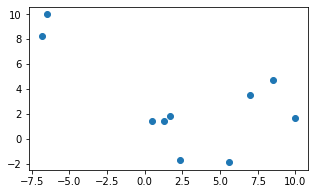

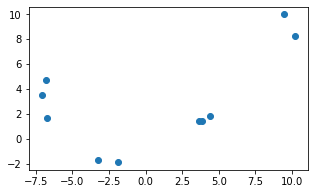

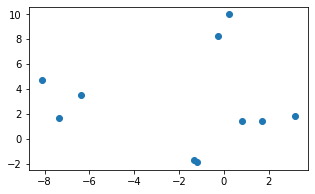

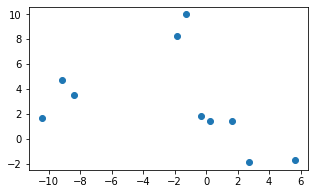

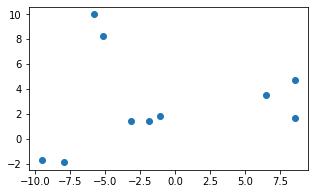

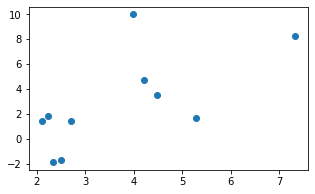

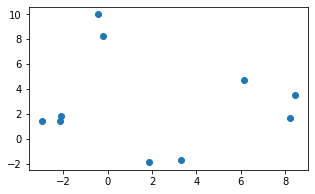

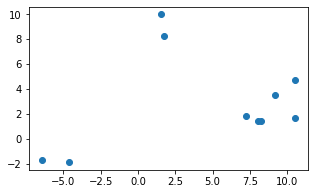

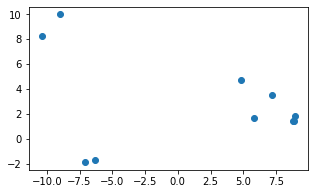

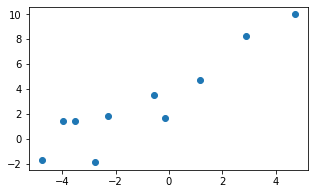

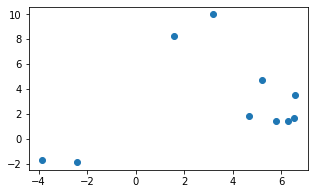

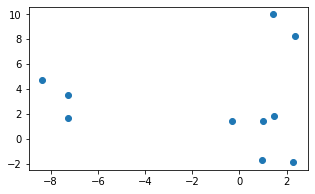

In [53]:
x,y= make_blobs(n_samples=10, centers=4, n_features=13,random_state=0)
plt.scatter(x[:,0], x[:,12])
plt.show()
plt.scatter(x[:,1], x[:,12])
plt.show()
plt.scatter(x[:,2], x[:,12])
plt.show()
plt.scatter(x[:,3], x[:,12])
plt.show()
plt.scatter(x[:,4], x[:,12])
plt.show()
plt.scatter(x[:,5], x[:,12])
plt.show()
plt.scatter(x[:,6], x[:,12])
plt.show()
plt.scatter(x[:,7], x[:,12])
plt.show()
plt.scatter(x[:,8], x[:,12])
plt.show()
plt.scatter(x[:,9], x[:,12])
plt.show()
plt.scatter(x[:,10], x[:,12])
plt.show()
plt.scatter(x[:,11], x[:,12])
plt.show()

In [70]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)
print(distances)

[[0.         3.76572558]
 [0.         4.98205568]
 [0.         6.14556262]
 [0.         4.99027366]
 [0.         4.99027366]
 [0.         5.15875078]
 [0.         2.915438  ]
 [0.         4.98205568]
 [0.         6.14556262]
 [0.         2.915438  ]]


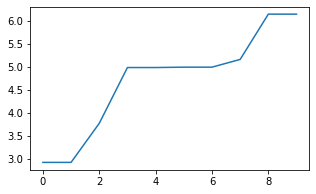

In [71]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)



In [72]:
m = DBSCAN(eps=6, min_samples=5)
m.fit(x)
clusters = m.labels_
print(clusters)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


<function matplotlib.pyplot.show(close=None, block=None)>

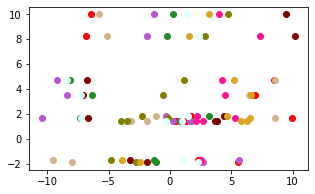

In [82]:
plt.scatter(x[:,0], x[:,12], color='red')

plt.scatter(x[:,1], x[:,12], color='maroon')

plt.scatter(x[:,2], x[:,12], color='forestgreen')

plt.scatter(x[:,3], x[:,12], color='mediumorchid')

plt.scatter(x[:,4], x[:,12], color='tan')

plt.scatter(x[:,5], x[:,12], color='deeppink')

plt.scatter(x[:,9], x[:,12], color='olive')

plt.scatter(x[:,10], x[:,12], color='goldenrod')

plt.scatter(x[:,11], x[:,12], color='lightcyan')
plt.show



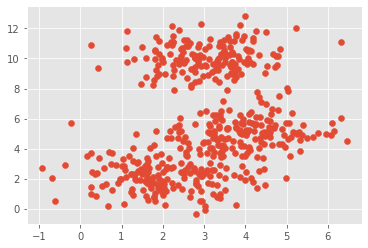

[[ 2.96670678  3.60206593]
 [ 3.06677805 10.01648211]]
Estimated clusters: 2


In [2]:
##MeanShit custering
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.datasets import make_blobs
centers = [[2,2],[4,5],[3,10]]
X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1)
plt.scatter(X[:,0],X[:,1])
plt.show()
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)

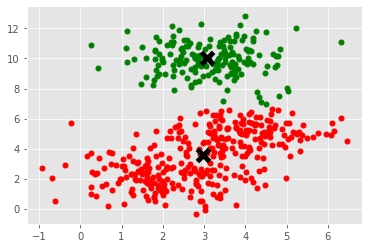

In [4]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(X)):
   plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker = "x",color = 'k', s = 150, linewidths = 5, zorder = 10)
plt.show()

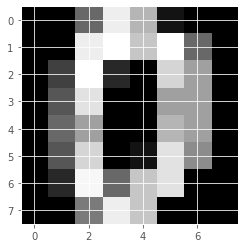

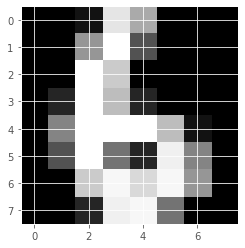

In [5]:
#K-Nearest Neighbors Classifier
from sklearn.datasets import *
import pandas as pd
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
def Image_display(i):
   plt.imshow(digit['images'][i],cmap = 'Greys_r')
   plt.show()
digit = load_digits()
digit_d = pd.DataFrame(digit['data'][0:1600])
Image_display(0)
train_x = digit['data'][:1600]
train_y = digit['target'][:1600]
KNN = KNeighborsClassifier(20)
KNN.fit(train_x,train_y)
KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
   metric_params = None, n_jobs = 1, n_neighbors = 20, p = 2,
   weights = 'uniform')
test = np.array(digit['data'][1725])
test1 = test.reshape(1,-1)
Image_display(1725)